# classification
- 주어진 데이터를 특정 클래스나 카테고리로 분류
- 주로 지도 학습(supervised learning)->학습
- 로지스틱 회귀(Logistic Regression), 결정 트리(Decision Tree), SVM(Support Vector Machine), 신경망(Neural Networks)등을 사용

# 1. k-neighbor classification
- k개의 이웃을 가져와 이중 가장 많은 종류를 차지하는 카테고리가 예측값일 확률이 클 것이다

## 데이터 준비

In [2]:
import pandas as pd
fish=pd.read_csv('https://bit.ly/fish_csv_data')
fish.shape,fish.head()

((159, 6),
   Species  Weight  Length  Diagonal   Height   Width
 0   Bream   242.0    25.4      30.0  11.5200  4.0200
 1   Bream   290.0    26.3      31.2  12.4800  4.3056
 2   Bream   340.0    26.5      31.1  12.3778  4.6961
 3   Bream   363.0    29.0      33.5  12.7300  4.4555
 4   Bream   430.0    29.0      34.0  12.4440  5.1340)

In [4]:
# 카테고리 종류
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

## 데이터 나누기->df를 array로/ x는 2차원, y는 1차원

In [6]:
# df를 array로
fish_5v=fish.iloc[:,1:].to_numpy()
fish_5v[:5]   #상위 5개 행 가져오기

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [12]:
# 범주형 데이터도 배열로 들어갈 수 있음
species=fish['Species'].to_numpy()   #[['Species']]로 하면 2차원됨
species.shape

(159,)

In [42]:
from sklearn.model_selection import train_test_split

train_5v, test_5v, train_species, test_species=train_test_split(fish_5v,species,random_state=1)

## 정규화- x만

In [43]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_5v)          #train set로 fit
train_5v_scaled=ss.transform(train_5v)
test_5v_scaled=ss.transform(test_5v)

## 학습- sklearn은 숫자변형 대신 문자열로도 그대로 사용가능

In [44]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(train_5v_scaled,train_species)  #학습
kn.score(train_5v_scaled,train_species), kn.score(test_5v_scaled,test_species)

(0.9159663865546218, 0.75)

In [45]:
kn.classes_    #알파벳순으로

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

## 예측-> 정규화 된 값을 넣어줘야함

In [46]:
kn.predict(test_5v_scaled[:5])

array(['Bream', 'Perch', 'Bream', 'Perch', 'Roach'], dtype=object)

## 확률 보기- kn.predict_proba

In [48]:
import numpy as np

proba=kn.predict_proba(test_5v_scaled[:5])
print(kn.classes_)
np.round(proba,2)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.67, 0.  , 0.33, 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.67, 0.  , 0.33, 0.  , 0.  ],
       [0.  , 0.  , 0.33, 0.  , 0.67, 0.  , 0.  ]])

### 단점: k개 선택시 가능한 확률은 0, 1/k ~ k-1/k ,1의 확률만 존재함

# 2. Logistic Regression
- 이름은 회귀지만 분류모델->선형방정식을 학습해서 뷴류값을 예측
- z= a X Weight + b X Length + c X Diagonal + d X Height + e X Width + f
- z는 어떤값도 가능하지만 확률이 되려면 0~1값이 되는것이 좋음
-  ㄴ 시그모이드함수(or 로지스틱함수)사용-> z가 아주큰 음수면 0, 아주큰 양수면 1
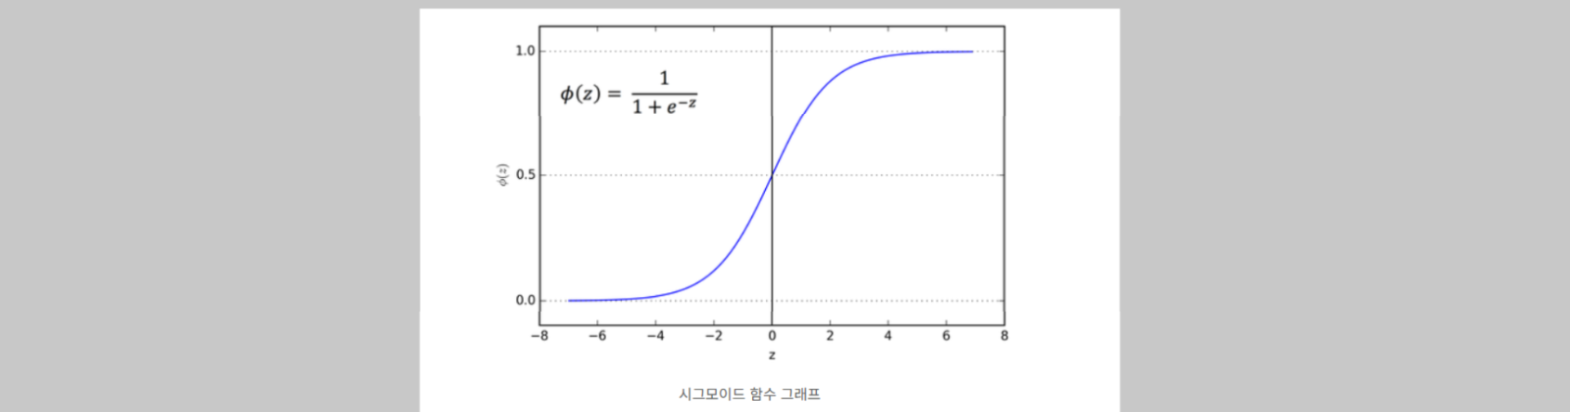

## 시그모이드 그리기

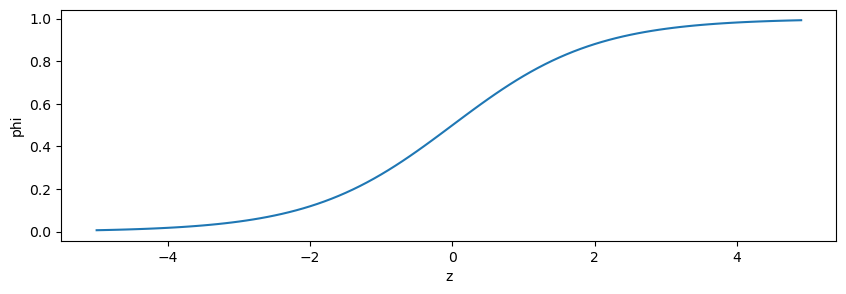

In [23]:
import matplotlib.pyplot as plt

z=np.arange(-5,5,0.1)
phi=1/(1+np.exp(-z))
plt.figure(figsize=(10,3))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

# 2-1. 로지스틱 회귀로 이진분류(결과가 두 개의 클래스 중 하나로 분류)
- ex) 스팸메일인지 스팸메일이 아닌지
- 원리: 하나의 선형방정식을 훈련->이 방정식 출력값(z)을 시그모이드함수에 통과시켜 0~1값으로

## 예시-빙어(Bream)와 도미(Smelt)로

In [49]:
# 데이터셋 준비
train_BS=train_5v_scaled[(train_species=='Bream')|(train_species=='Smelt')]   #빙어/도미 트레인셋
species_BS=train_species[(train_species=='Bream')|(train_species=='Smelt')]   #빙어/도미 정답

## 학습 by sklearn.linear_model.LogisticRegression

In [50]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(train_BS, species_BS)

LogisticRegression()

## 예측

In [51]:
lr.predict(train_BS[:5])

array(['Smelt', 'Bream', 'Bream', 'Bream', 'Smelt'], dtype=object)

## 확률

In [52]:
print(lr.classes_) 
np.round(lr.predict_proba(train_BS[:5]),3)

['Bream' 'Smelt']


array([[0.033, 0.967],
       [0.982, 0.018],
       [0.999, 0.001],
       [0.994, 0.006],
       [0.067, 0.933]])

## 로지스틱 회귀 계수 확인

In [53]:
lr.coef_, lr.intercept_

(array([[-0.44479826, -0.61824467, -0.70923385, -1.07188704, -0.78648293]]),
 array([-2.25240524]))

### z =-0.44 X Weight -0.61 X Length -0.71 X Diagonal -1.07 X Height -0.78 X Width -2.25

In [54]:
# z값 확인
z=lr.decision_function(train_BS[:5])   #1~5행의 z값들
z

array([ 3.37001144, -3.98058299, -6.6024513 , -5.11456221,  2.63137546])

## z값을 시그모이드 함수(expit)에 넣어 확률 구하기-> 위의 확률과 동일

In [55]:
from scipy.special import expit

expit(z)    #0에 가까우면 bream, 1에 가까우면 smelt

array([0.96675406, 0.0183324 , 0.0013552 , 0.00597272, 0.93285376])

# 2-2. 로지스틱 회귀로 다중 분류
- 다중 분류는 각 클래스마다 z값을 하나씩 계산->가장 높은 z값을 가지는 클래스가 예측 클래스
- 릿지 회귀처럼 계수의 제곱을 규제, 옵션은 C
- C는 값이 커질수록 규제 완화, 작아질수록 규제가 커짐
- 원리: 클래스 개수만큼 방정식을 훈련->각 z값을 소프트맥스에 집어넣어 전체클래스에 대한 합이 항상 1이되도록함->그러면 각 클래스의 값이 그 클래스일 확률이 됨

In [63]:
lr=LogisticRegression(C=20, max_iter=1000)  # default는 C=1, max_iter=100 ->반복횟수를 늘려줘야 정학한 예측
lr.fit(train_5v_scaled,train_species)

lr.score(train_5v_scaled,train_species), lr.score(test_5v_scaled,test_species)

(0.9327731092436975, 0.825)

## 예측

In [72]:
lr.predict(test_5v_scaled[:5])

array(['Bream', 'Roach', 'Bream', 'Perch', 'Perch'], dtype=object)

In [76]:
print(lr.classes_)
np.round(lr.predict_proba(test_5v_scaled[:5]),3)   #확률 높은 인덱스가 예측값

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


array([[1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.027, 0.318, 0.004, 0.606, 0.013, 0.031],
       [0.991, 0.005, 0.   , 0.   , 0.   , 0.   , 0.004],
       [0.   , 0.003, 0.755, 0.003, 0.224, 0.003, 0.012],
       [0.   , 0.025, 0.658, 0.004, 0.191, 0.106, 0.016]])

In [79]:
lr.coef_, lr.intercept_   # 로지스틱 회귀는 모든 class에 대한 z값을 계산하려함

(array([[-1.52473852, -0.98170291,  2.57814136,  7.41685545, -0.59852402],
        [ 0.13555755, -1.98277931, -3.59295519,  6.20735988, -2.11121439],
        [ 3.66473368,  4.95368028, -8.76868722, -5.27981579,  5.02398211],
        [-0.07929428,  3.39963064,  3.62366331, -3.15420477, -1.46315351],
        [-3.21037947, -5.45459904,  4.50014947, -1.04186866,  3.28539821],
        [-1.23743122,  0.86636319,  0.99425416, -4.65466846, -4.36373854],
        [ 2.25155226, -0.80059285,  0.66543411,  0.50634234,  0.22725014]]),
 array([ 0.06119474, -0.57597357,  2.95905136, -0.05631792,  1.32908375,
        -6.24933138,  2.53229301]))

## 다중 분류는 시그모이드가 아닌 소프트맥스 함수 사용
- 여러 결과를 0~1사이로 압축하고 전체합이 1이 되도록 함
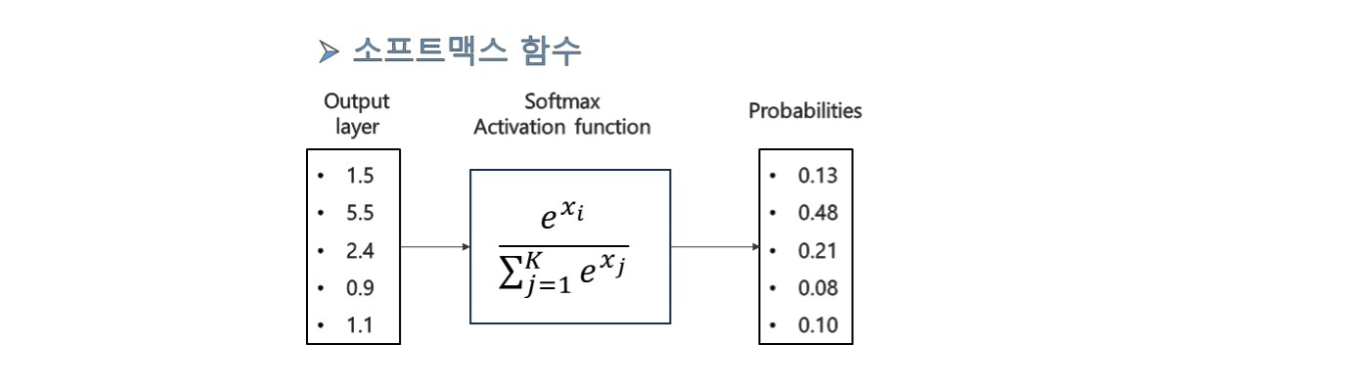
### k는 class개수, xi는 각 z값/ 전체합해서 나눔

In [80]:
# z값
z=lr.decision_function(test_5v_scaled[:5])
np.round(z,2)

array([[ 15.75,   6.69,  -1.29,  -3.56,  -2.18, -23.18,   7.76],
       [ -4.4 ,   0.22,   2.67,  -1.66,   3.32,  -0.5 ,   0.35],
       [ 10.25,   4.97,  -2.88,  -2.45,   0.09, -14.62,   4.63],
       [ -5.07,  -0.92,   4.51,  -1.2 ,   3.29,  -0.94,   0.33],
       [ -6.36,   0.33,   3.6 ,  -1.57,   2.36,   1.78,  -0.14]])

## 소프트맥스 값 계산-> 위의 확률과 동일해짐

In [81]:
from scipy.special import softmax

sm=softmax(z,axis=1)   #각 행안에서(가로로) 계산
np.round(sm,3)

array([[1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.027, 0.318, 0.004, 0.606, 0.013, 0.031],
       [0.991, 0.005, 0.   , 0.   , 0.   , 0.   , 0.004],
       [0.   , 0.003, 0.755, 0.003, 0.224, 0.003, 0.012],
       [0.   , 0.025, 0.658, 0.004, 0.191, 0.106, 0.016]])

# 3.확률적 경사 하강법(Stochastic Gradient Descent)
- 생선분류하고 싶은데 클래스가 다른 생선들이 매주 매주 추가된다면?
- 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련하는 방식
- 하나의 샘플을 랜덤하게 골라 산위에서 부터 가장 가파른 경사를 따라 원하는 지점에 가장 빠르게 도달하는 것
- (이때 한번 이동량이 너무크면 내려오기도 전에 다시 올라갈수있음->적당한 간격을 찾는게 중요)
- 하나골라 내려오고 원하는 지점 도착 못하면 다시 새로운 샘플골라 내려오면서 반복하면서 만족할만한 위치에 도달
- 이때 전체 데이터 한바퀴 다 돌아도 못찾으면 다시 반복
- 확률적 경사하강법에서 훈련세트를 한번 모두 사용하는것을 epoch라고 부름
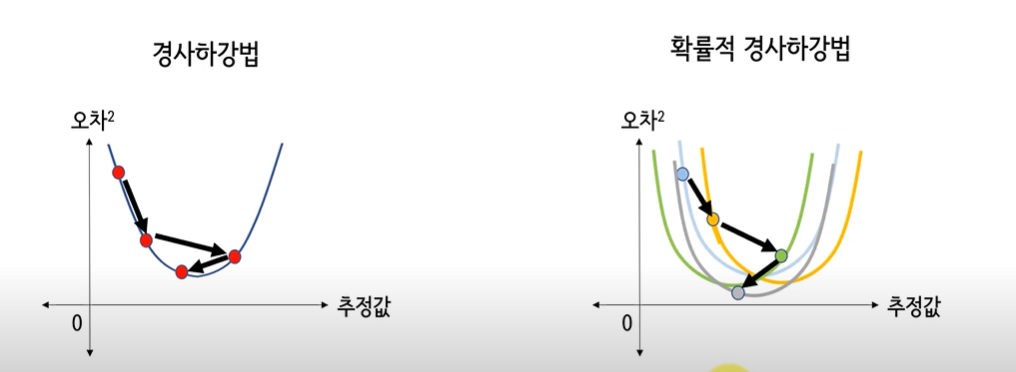
### 이렇게 반복하면서 원하는 지점을 찾음

## 미니배치 경사하강법->한번에 하나가 아닌 여러 샘플사용해 경사하강법 사용
## 배치 경사하강법-> 전체 샘플 사용해 경사하강
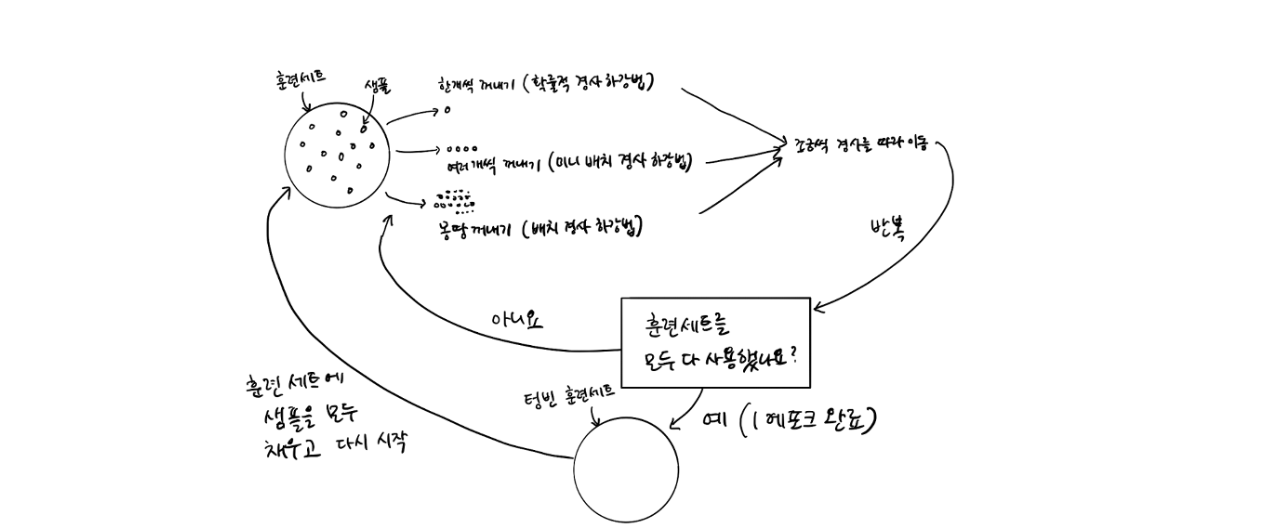

## 이러한 원리로 훈련데이터가 모두 준비되어있지 않고 매일매일 업데이트 되어도 학습가능+산꼭대기에서부터 시작할 필요X

# --손실함수(loss function)--
## 그러면 어디서부터 내려가면되고 이 산은 도대체 뭔가-> 산 = 손실함수
- 손실함수: 머신러닝 알고리즘이 얼마나 엉터리인지->이 값이 작을수록 좋음<-이 값이 내려오면서 찾고싶은 지점
- 최소값이 얼만지 모르므로 가능한 많이 찾아보고 만족할 만한 수준이라면 산을 다 내려왔더고 인정
- 분류에서의 손실 = 정답을 못 맞히는것-> 오차가 가장 적은 곳을 찾아가기
- 산을 내려오기위해서는 산이 연속적이어야하며(끊기지않고) 손실함수 또한 연속적이어야 함(미분가능해야함 !!!!!!)

# --로지스틱 손실 함수--
### -이진 크로스엔트로피 손실함수: 이진분류에 사용
### -크로스엔트로피 손실함수: 다중 분류에 사용

In [97]:
# 이진 크로스엔트로피 예시
pd.DataFrame(data,index=['생선1','생선2','생선3','생선4'])

,예측,정답,예측확률,변형,손실값,예측확률에 로그화
생선1,1,1,0.9,정답이 1이므로 0.9*1(정답값)*(-1)=,-0.9,0.045757
생선2,0,1,0.3,정답이 1이므로 0.3*1(정답값)*(-1)=,-0.3,0.522879
생선3,0,0,0.2,정답이 0이므로 (1-0.2)*1*(-1)=,-0.8,0.096910
생선4,1,0,0.8,정답이 0이므로 (1-0.8)*1*(-1),-0.2,0.698970


## 손실값이 작을수록(-1에 가까워질수록) 낮은 손실이다(정답을 맞힐 확률이 높다)
## 혹은 예측확률에 바로 로그화에서 0에 가까우면 낮은손실이다
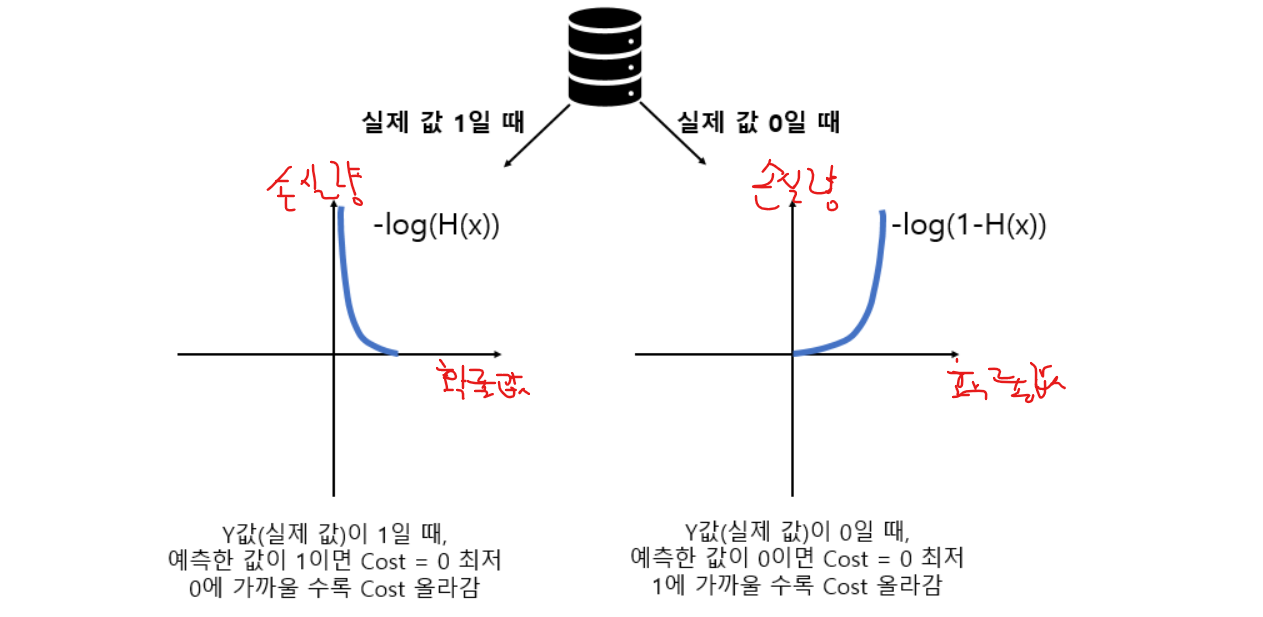  
### y=1일때 확률값이 1에 가까워질수록 손실이 적고 0에 가까워질수록 손실이 매우 커진다
### y=0일때 확률값이 0에 가까워질수록 손실이 적고 1에 가까워질수록 손실이 매우 커진다

# SGDClassifier

In [99]:
from sklearn.linear_model import SGDClassifier

## 첫 학습
- loss(손실함수 종류)=log_loss :로지스틱 손실함수
-  ㄴ 클래스마다 이진 분류모델을 만듬: 도미를 1(양성)로 나머지를 0(음성)->그 다음은 빙어를1로 ->...모든 클래스에
-  max_iter는 수행할 epoch횟수

In [100]:
sc=SGDClassifier(loss='log_loss', max_iter=10, random_state=123)  
sc.fit(train_5v_scaled,train_species)
sc.score(train_5v_scaled,train_species), sc.score(test_5v_scaled,test_species)

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


(0.773109243697479, 0.675)

## 이어 훈련하기: partial_fit사용

In [125]:
sc.partial_fit(train_5v_scaled,train_species)    #계속 진행할수록 오류 줄어듬
sc.score(train_5v_scaled,train_species), sc.score(test_5v_scaled,test_species) 

(0.8151260504201681, 0.8)

## 그러면 언제까지 훈련?
## ->훈련할수록 정확도가 증가하다 어느순간 테스트 정확도는 오히려 감소하기 시작
## -> 훈련세트를 너무 학습해서 과대적합되었기 때문
## ->여기서 멈추는 것을 '조기종료'하고 함

In [126]:
sc=SGDClassifier(loss='log_loss', random_state=123)  
train_score=[]
test_score=[]
classes=np.unique(train_species)   #고유 생선종들

In [127]:
# 그냥 fit없이 partial_fit만 사용
for _ in range(0,300):
    sc.partial_fit(train_5v_scaled,train_species, classes=classes)    #partial_fit만 사용시 classes넣어줘야함
    train_score.append(sc.score(train_5v_scaled,train_species))
    test_score.append(sc.score(test_5v_scaled,test_species)) 

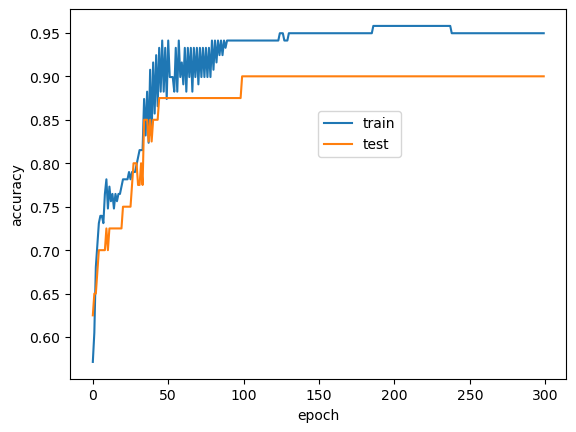

In [132]:
#그래프 그리기
plt.plot(train_score,label='train')
plt.plot(test_score, label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc=(0.5,0.6))
plt.show()

## epoch횟수는 120정도가 적합해보임

In [150]:
# SGD는 일정 에포크동안 성능이 향상되지 않으면 훈련을 자동으로 멈춤
sc=SGDClassifier(loss='log_loss', max_iter=120, random_state=123,tol=None) # tol=None으로하며 멈추지 않고 120까지 무조건 도달하게함 
sc.fit(train_5v_scaled,train_species)
sc.score(train_5v_scaled,train_species), sc.score(test_5v_scaled,test_species)

(0.9495798319327731, 0.9)

In [141]:
data={'Species':['King']*20,
     'Weight':np.random.randint(200,350,20),
     'Length':np.random.randint(20,30,20),
     'Diagnol':np.random.randint(22,32,20),
     'Height':np.random.randint(6,9,20),
     'Width':np.random.randint(5,7,20)}
newfish=pd.DataFrame(data)
newfish.head()

,Species,Weight,Length,Diagnol,Height,Width
0,King,342,29,25,8,5
1,King,214,21,25,7,5
2,King,265,20,31,7,6
3,King,219,22,25,6,5
4,King,313,20,22,7,6


In [142]:
newfish_5v=newfish.iloc[:,1:].to_numpy()
newspecies=newfish['Species'].to_numpy()
train_new5v, test_new5v, train_newspecies, test_newspecies=train_test_split(newfish_5v,newspecies,random_state=1)
train_new5v_scaled=ss.transform(train_new5v)
test_new5v_scaled=ss.transform(test_new5v)

## 예측

In [170]:
newdata=test_new5v_scaled   #임의의 숫자로 만들어둔 샘플
sc.predict(newdata)

array(['Perch', 'Roach', 'Roach', 'Perch', 'Roach'], dtype='<U9')

## 힌지(hinge)손실: 디폴트 값이며 SVM(support vector machine)에 자주 사용되는 손실함수

In [134]:
# SGD의
sc=SGDClassifier(loss='hinge', max_iter=120, random_state=123,tol=None) 
sc.fit(train_5v_scaled,train_species)
sc.score(train_5v_scaled,train_species), sc.score(test_5v_scaled,test_species)

(0.9495798319327731, 0.9)